In [1]:

!pip install qiskit qiskit-aer -q

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00


In [2]:

def inverse_qft(qc, n):
    """Apply the inverse Quantum Fourier Transform on n qubits."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc


In [3]:

def qpe_circuit(num_count_qubits, theta):
    """
    Constructs the Quantum Phase Estimation (QPE) circuit.
    num_count_qubits: number of counting qubits
    theta: phase parameter (for U gate)
    """
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)

    # Step 1: Apply Hadamard gates on counting qubits
    qc.h(range(num_count_qubits))

    # Step 2: Prepare eigenstate (|1>) for the target qubit
    qc.x(num_count_qubits)

    # Step 3: Apply controlled unitary operations (controlled phase rotations)
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    # Step 4: Apply inverse QFT to counting qubits
    inverse_qft(qc, num_count_qubits)

    # Step 5: Measure counting qubits
    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc


In [4]:

def run_qpe(num_count_qubits=3, theta=0.125):
    """Executes the QPE circuit and visualizes the phase estimation result."""
    simulator = AerSimulator()
    qc = qpe_circuit(num_count_qubits, theta)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.title(f"QPE Result for θ = {theta}")
    plt.show()
    print(qc.draw(output='text'))


Running Quantum Phase Estimation with 3 counting qubits and phase 0.125


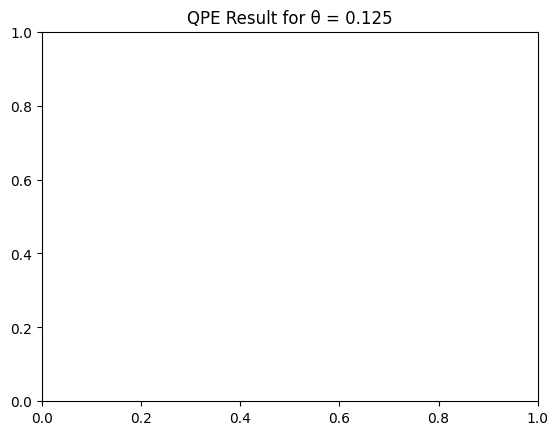

     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─

In [5]:

num_count_qubits = 3
theta = 0.125  # phase = 1/8
print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
run_qpe(num_count_qubits, theta)


**Task1**


Running QPE with θ = 0.25


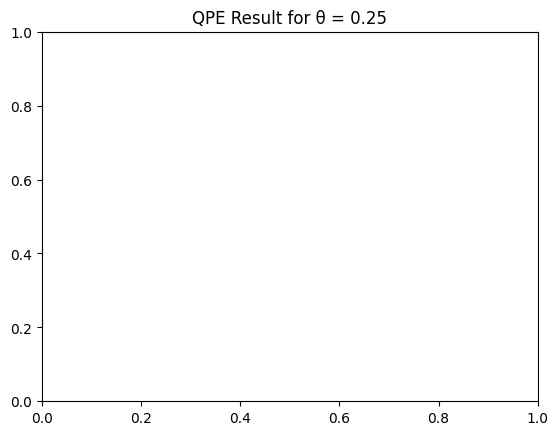

     ┌───┐                           ┌───┐                                   »
q_0: ┤ H ├─■───────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                       │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■──────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │              │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼──────■───────X──────────────────────■─────────■────────»
     ├───┤ │P(π/2)  │P(π)  │P(2π)                                            »
q_3: ┤ X ├─■────────■──────■─────────────────────────────────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─╫─┤M├
«    

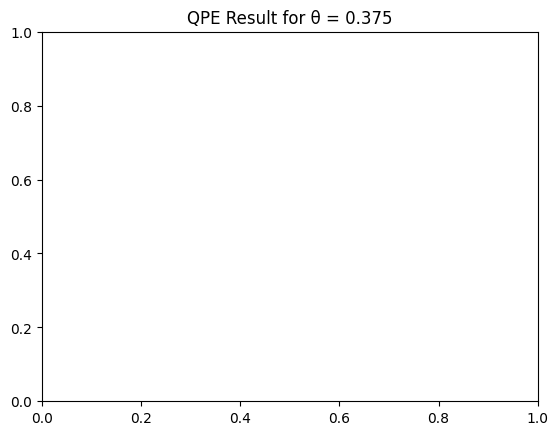

     ┌───┐                               ┌───┐                         »
q_0: ┤ H ├─■───────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                           │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■─────────────────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                 │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■───────X──────────────────────■────────»
     ├───┤ │P(3π/4)  │P(3π/2)  │P(3π)                                  »
q_3: ┤ X ├─■─────────■─────────■───────────────────────────────────────»
     └───┘                                                             »
c: 3/══════════════════════════════════════════════════════════════════»
                                                                       »
«               ┌─┐           
«q_0: ──────────┤M├───────────
«               └╥┘     ┌─┐   
«q_1: ─■─────────╫──────┤M├───
«      │P(-π/2)  ║ ┌───┐└╥┘┌─┐
«q_2: ─■─────────╫─┤ H ├─╫─┤M├
«          

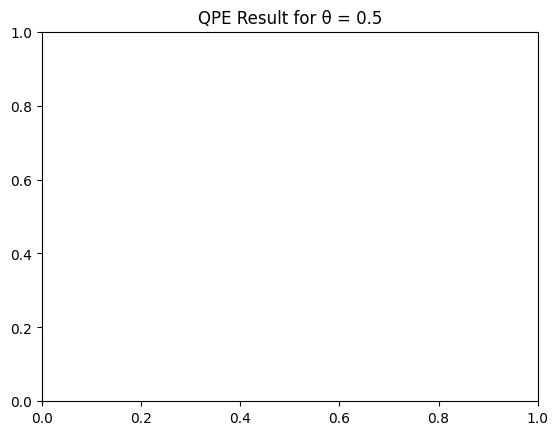

     ┌───┐                          ┌───┐                                   ┌─┐»
q_0: ┤ H ├─■──────────────────────X─┤ H ├─■──────────────■──────────────────┤M├»
     ├───┤ │                      │ └───┘ │P(-π/2) ┌───┐ │                  └╥┘»
q_1: ┤ H ├─┼──────■───────────────┼───────■────────┤ H ├─┼─────────■─────────╫─»
     ├───┤ │      │               │                └───┘ │P(-π/4)  │P(-π/2)  ║ »
q_2: ┤ H ├─┼──────┼───────■───────X──────────────────────■─────────■─────────╫─»
     ├───┤ │P(π)  │P(2π)  │P(4π)                                             ║ »
q_3: ┤ X ├─■──────■───────■──────────────────────────────────────────────────╫─»
     └───┘                                                                   ║ »
c: 3/════════════════════════════════════════════════════════════════════════╩═»
                                                                             0 »
«                
«q_0: ───────────
«          ┌─┐   
«q_1: ─────┤M├───
«     ┌───┐└╥┘┌─┐
«q_2: ┤ H ├─╫─┤M├
«

In [6]:

for theta in [0.25, 0.375, 0.5]:
    print(f"\nRunning QPE with θ = {theta}")
    run_qpe(num_count_qubits=3, theta=theta)


**Task2**


Running QPE with 3 counting qubits, θ = 0.125


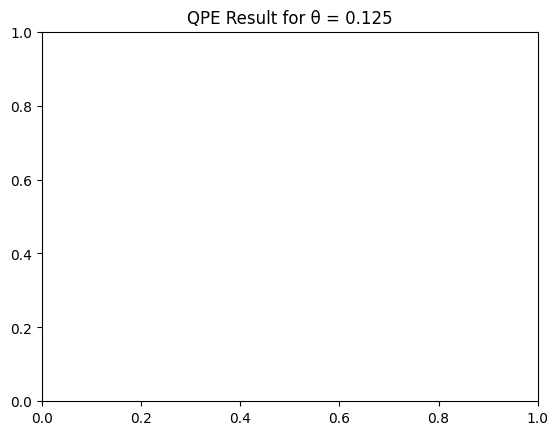

     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─

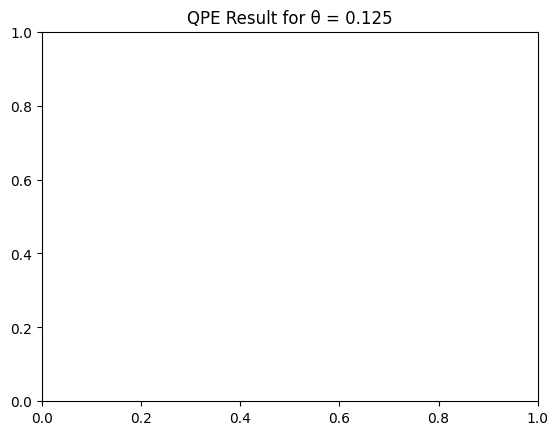

     ┌───┐                                    ┌───┐                         »
q_0: ┤ H ├─■────────────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                                │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼────────■─────────────────X─────┼───────■────────┤ H ├─┼────────»
     ├───┤ │        │                 │     │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼────────┼────────■────────X─────┼──────────────────────■────────»
     ├───┤ │        │        │              │                               »
q_3: ┤ H ├─┼────────┼────────┼──────■───────X───────────────────────────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)  │P(2π)                                  »
q_4: ┤ X ├─■────────■────────■──────■───────────────────────────────────────»
     └───┘                                                                  »
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                

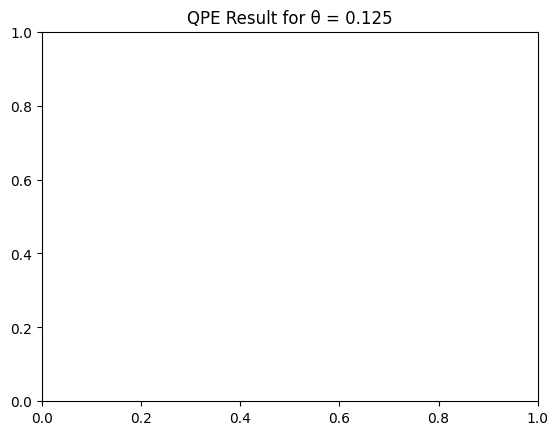

     ┌───┐                                            ┌───┐               »
q_0: ┤ H ├─■────────────────────────────────────────X─┤ H ├─■─────────────»
     ├───┤ │                                        │ └───┘ │P(-π/2) ┌───┐»
q_1: ┤ H ├─┼────────■─────────────────────────X─────┼───────■────────┤ H ├»
     ├───┤ │        │                         │     │                └───┘»
q_2: ┤ H ├─┼────────┼────────■────────────────┼─────┼─────────────────────»
     ├───┤ │        │        │                │     │                     »
q_3: ┤ H ├─┼────────┼────────┼──────■─────────X─────┼─────────────────────»
     ├───┤ │        │        │      │               │                     »
q_4: ┤ H ├─┼────────┼────────┼──────┼───────■───────X─────────────────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)  │P(2π)  │P(4π)                        »
q_5: ┤ X ├─■────────■────────■──────■───────■─────────────────────────────»
     └───┘                                                                »
c: 5/═══════

In [7]:

for num_qubits in [3, 4, 5]:
    print(f"\nRunning QPE with {num_qubits} counting qubits, θ = 0.125")
    run_qpe(num_count_qubits=num_qubits, theta=0.125)


**Task3**

In [10]:

def theoretical_phase(theta, num_qubits):
    """Return expected binary representation of the phase."""
    decimal = theta
    binary = format(int(decimal * (2 ** num_qubits)), f'0{num_qubits}b')
    print(f"Theoretical binary phase for θ = {theta}: {binary}")
    return binary

theoretical_phase(0.125, 3)
theoretical_phase(0.25, 3)
theoretical_phase(0.375, 3)
theoretical_phase(0.5, 3)


Theoretical binary phase for θ = 0.125: 001
Theoretical binary phase for θ = 0.25: 010
Theoretical binary phase for θ = 0.375: 011
Theoretical binary phase for θ = 0.5: 100


'100'

**Task4**

In [15]:
qc = qpe_circuit(3, 0.125)
print(qc.draw(output='text'))



     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─

**Task5**

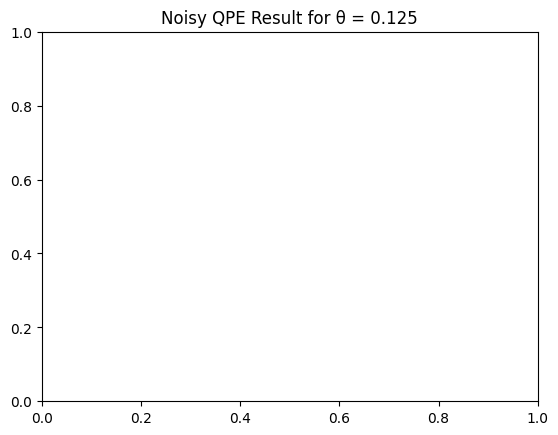

In [13]:

from qiskit_aer.noise import NoiseModel, depolarizing_error

noise_model = NoiseModel()
error_1 = depolarizing_error(0.02, 1)
error_2 = depolarizing_error(0.05, 2)
noise_model.add_all_qubit_quantum_error(error_1, ['h', 'x'])
noise_model.add_all_qubit_quantum_error(error_2, ['cp'])

def run_qpe_with_noise(num_count_qubits=3, theta=0.125, noise_model=noise_model):
    simulator = AerSimulator(noise_model=noise_model)
    qc = qpe_circuit(num_count_qubits, theta)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.title(f"Noisy QPE Result for θ = {theta}")
    plt.show()

run_qpe_with_noise(3, 0.125)

